# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100
import xlrd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


In [54]:
#pip install flask_sqlalchemy
from openpyxl import Workbook

# Ingest Data  

In [55]:
df=pd.read_excel("World military power.xlsx")


# EDA

In [56]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Ango

In [57]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

## Implement basic steps to see how is your data looks like

In [58]:
df.describe().T

,count,unique,top,freq
2020 ranking,139,139,Military Strength,1
Unnamed: 1,139,139,Military Strength Power Index,1
Airforce Strength,139,139,Aircraft Strength,1
Unnamed: 3,139.0,114.0,19.0,5.0
Unnamed: 4,139,139,Fighter/Interceptor Strength,1
Unnamed: 5,139.0,64.0,0.0,46.0
Unnamed: 6,139,139,Attack Aircraft Strength,1
Unnamed: 7,139.0,39.0,0.0,75.0
Unnamed: 8,139,139,Transport Aircraft Fleet Strength,1
Unnamed: 9,139.0,50.0,0.0,15.0


In [59]:
df.shape

(139, 60)

In [60]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

2020 ranking has 139 unique value
Unnamed: 1 has 139 unique value
Airforce Strength has 139 unique value
Unnamed: 3 has 114 unique value
Unnamed: 4 has 139 unique value
Unnamed: 5 has 64 unique value
Unnamed: 6 has 139 unique value
Unnamed: 7 has 39 unique value
Unnamed: 8 has 139 unique value
Unnamed: 9 has 50 unique value
Unnamed: 10 has 139 unique value
Unnamed: 11 has 78 unique value
Unnamed: 12 has 139 unique value
Unnamed: 13 has 98 unique value
Unnamed: 14 has 139 unique value
Unnamed: 15 has 46 unique value
Land Strength has 139 unique value
Unnamed: 17 has 107 unique value
Unnamed: 18 has 139 unique value
Unnamed: 19 has 131 unique value
Unnamed: 20 has 139 unique value
Unnamed: 21 has 71 unique value
Unnamed: 22 has 139 unique value
Unnamed: 23 has 92 unique value
Unnamed: 24 has 139 unique value
Unnamed: 25 has 69 unique value
Navy Strength has 125 unique value
Unnamed: 27 has 79 unique value
Unnamed: 28 has 116 unique value
Unnamed: 29 has 6 unique value
Unnamed: 30 has 116

## Convert multi index columns to one level

In [61]:
df

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Ango

In [62]:
df.columns = df.loc[0]

In [63]:
df.drop(0,inplace=True)

In [64]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

## Detect and drop duplicated columns

In [65]:
df = df.drop_duplicates()
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [66]:
df["Military Strength"].value_counts()

Afghanistan                         1
Peru                                1
North Macedonia                     1
Norway                              1
Oman                                1
Pakistan                            1
Panama                              1
Paraguay                            1
Philippines                         1
Serbia                              1
Poland                              1
Portugal                            1
Qatar                               1
Republic of the Congo               1
Romania                             1
Russia                              1
North Korea                         1
Nigeria                             1
Niger                               1
Nicaragua                           1
New Zealand                         1
Netherlands                         1
Nepal                               1
Namibia                             1
Myanmar                             1
Mozambique                          1
Morocco     

## Check for missing values 

In [69]:
df[df["Total Border Coverage value"].isnull()] # isnull by  Total Border Coverage value (target column)]

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
7,Australia,0.3225,Australia,464.0,Australia,82.0,Australia,6.0,Australia,38.0,Australia,174.0,Australia,133.0,Australia,22.0,Australia,59.0,Australia,3051.0,Australia,0.0,Australia,54.0,Australia,0.0,Australia,48.0,Australia,2.0,Australia,6.0,Australia,2.0,Australia,8.0,Australia,"26,30,00,00,000",Australia,"17,14,00,00,00,000",Australia,480.0,Australia,"2,63,000",Australia,"10,05,000",Australia,"1,82,10,00,000",Australia,"1,08,08,002",Australia,"2,34,70,145",Australia,"77,41,220",Australia,25760.0,Australia,2000.0,NaN,NaN
10,Bahrain,1.8547,Bahrain,109.0,Bahrain,17.0,Bahrain,0.0,Bahrain,2.0,Bahrain,37.0,Bahrain,65.0,Bahrain,22.0,Bahrain,180.0,Bahrain,843.0,Bahrain,33.0,Bahrain,26.0,Bahrain,17.0,Bahrain,39.0,Bahrain,0.0,Bahrain,0.0,Bahrain,0.0,Bahrain,1.0,Bahrain,"1,41,50,00,000",Bahrain,"52,15,00,00,000",Bahrain,4.0,Bahrain,45000.0,Bahrain,55000.0,Bahrain,"12,46,00,000",Bahrain,"8,06,505",Bahrain,"14,22,659",Bahrain,760.0,Bahrain,161.0,Bahrain,0.0,NaN,NaN
58,Japan,0.1501,Japan,1561.0,Japan,279.0,Japan,12.0,Japan,60.0,Japan,427.0,Japan,637.0,Japan,119.0,Japan,1004.0,Japan,3130.0,Japan,238.0,Japan,500.0,Japan,99.0,Japan,155.0,Japan,4.0,Japan,20.0,Japan,40.0,Japan,0.0,Japan,"49,00,00,00,000",Japan,"32,40,00,00,00,000",Japan,175.0,Japan,3841.0,Japan,"40,00,000",Japan,"4,41,20,000",Japan,"5,38,73,803",Japan,"12,61,68,156",Japan,"3,77,915",Japan,29751.0,Japan,1770.0,NaN,NaN
70,Madagascar,3.0869,Madagascar,6.0,Madagascar,0.0,Madagascar,0.0,Madagascar,0.0,Madagascar,0.0,Madagascar,6.0,Madagascar,0.0,Madagascar,12.0,Madagascar,103.0,Madagascar,0.0,Madagascar,25.0,Madagascar,0.0,Madagascar,8.0,Madagascar,0.0,Madagascar,0.0,Madagascar,0.0,Madagascar,0.0,Madagascar,"11,50,00,000",Madagascar,"4,08,90,00,000",Madagascar,83.0,Madagascar,0.0,Madagascar,18500.0,Madagascar,0.0,Madagascar,"1,01,45,026",Madagascar,"2,56,83,610",Madagascar,"5,87,040",Madagascar,4828.0,Madagascar,600.0,NaN,NaN
84,New Zealand,1.3684,New Zealand,48.0,New Zealand,0.0,New Zealand,0.0,New Zealand,7.0,New Zealand,13.0,New Zealand,22.0,New Zealand,0.0,New Zealand,0.0,New Zealand,200.0,New Zealand,0.0,New Zealand,24.0,New Zealand,0.0,New Zealand,11.0,New Zealand,0.0,New Zealand,0.0,New Zealand,0.0,New Zealand,2.0,New Zealand,"4,30,00,00,000",New Zealand,"91,62,00,00,000",New Zealand,123.0,New Zealand,31480.0,New Zealand,"1,50,000",New Zealand,"5,69,00,000",New Zealand,"21,15,989",New Zealand,"45,45,627",New Zealand,"2,67,710",New Zealand,15134.0,New Z

In [70]:
null_data = df[df.isnull().any(axis=1)]

In [71]:
null_data.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
6,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,Armenia,13.0,Armenia,37.0,Armenia,20.0,Armenia,110.0,Armenia,748.0,Armenia,38.0,Armenia,150.0,Armenia,68.0,Armenia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armenia,"1,38,50,00,000",Armenia,"10,41,00,00,000",Armenia,11.0,Armenia,0.0,Armenia,47500.0,Armenia,0.0,Armenia,"16,96,085",Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
7,Australia,0.3225,Australia,464.0,Australia,82.0,Australia,6.0,Australia,38.0,Australia,174.0,Australia,133.0,Australia,22.0,Australia,59.0,Australia,3051.0,Australia,0.0,Australia,54.0,Australia,0.0,Australia,48.0,Australia,2.0,Australia,6.0,Australia,2.0,Australia,8.0,Australia,"26,30,00,00,000",Australia,"17,14,00,00,00,000",Australia,480.0,Australia,"2,63,000",Australia,"10,05,000",Australia,"1,82,10,00,000",Australia,"1,08,08,002",Australia,"2,34,70,145",Australia,"77,41,220",Australia,25760.0,Australia,2000.0,NaN,NaN
8,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,Austria,32.0,Austria,62.0,Austria,0.0,Austria,56.0,Austria,467.0,Austria,33.0,Austria,0.0,Austria,0.0,Austria,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,"3,38,00,00,000",Austria,"6,30,80,00,00,000",Austria,52.0,Austria,14260.0,Austria,"2,15,000",Austria,"4,30,00,000",Austria,"40,17,691",Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
10,Bahrain,1.8547,Bahrain,109.0,Bahrain,17.0,Bahrain,0.0,Bahrain,2.0,Bahrain,37.0,Bahrain,65.0,Bahrain,22.0,Bahrain,180.0,Bahrain,843.0,Bahrain,33.0,Bahrain,26.0,Bahrain,17.0,Bahrain,39.0,Bahrain,0.0,Bahrain,0.0,Bahrain,0.0,Bahrain,1.0,Bahrain,"1,41,50,00,000",Bahrain,"52,15,00,00,000",Bahrain,4.0,Bahrain,45000.0,Bahrain,55000.0,Bahrain,"12,46,00,000",Bahrain,"8,06,505",Bahrain,"14,22,659",Bahrain,760.0,Bahrain,161.0,Bahrain,0.0,NaN,NaN
12,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,Belarus,28.0,Belarus,63.0,Belarus,21.0,Belarus,532.0,Belarus,1560.0,Belarus,482.0,Belarus,228.0,Belarus,238.0,Belarus,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belarus,"62,37,02,800",Belarus,"39,92,00,00,000",Belarus,65.0,Belarus,32000.0,Belarus,"1,90,000",Belarus,"19,80,00,000",Belarus,"49,82,905",Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0


## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

## Fix the dtypes

In [72]:
df.replace(",","",inplace=True,regex=True)

In [73]:
for i in df.iloc[:,1::2].columns:
    df[i] = df[i].astype("float")

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [74]:
df.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Croatia,Cuba,Czechia,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Madagascar,Malaysia,Mali,Mauritania,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Romania,Russia,Saudi Arabia,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Military Strength Power Index,1.3444,2.3137,0.4659,0.8379,0.6521,2.1251,0.3225,0.9568,0.9463,1.8547,0.7066,0.8179,1.0499,10.1681,0.9942,3.8586,2.0582,0.1988,0.8916,1.9009,2.0557,1.9902,0.3712,3.2889,1.6383,0.7668,0.0691,0.6045,1.0183,1.2208,0.5531,1.1389,0.7878,2.7504,1.0062,0.1872,3.1291,2.5893,0.8581,0.8498,0.1702,3.3736,1.6679,0.2186,2.0554,0.5311,1.8302,2.0943,0.8215,0.0953,0.2544,0.2191,0.7911,1.9481,0.3111,0.2111,2.0236,0.1501,1.1441,0.9098,1.5287,1.5701,1.9244,3.4433,2.0145,2.5193,5.5737,1.3696,1.4752,3.0869,0.6546,1.8941,3.0477,0.6065,2.1291,2.0299,2.9941,0.8408,2.3364,0.5691,3.2817,2.9891,0.5919,1.3684,2.2747,2.0153,0.6485,0.3718,3.1808,0.5277,1.2514,0.2364,3.6537,2.1898,0.6219,0.7852,0.3397,0.8612,1.6703,2.9509,0.6177,0.0681,0.3034,0.9479,4.2063,0.7966,0.8466,1.9496,4.6404,0.4985,0.1509,2.3501,0.3388,1.4661,1.3017,4.6042,0.5304,0.5259,0.8241,0.4008,1.8661,2.0651,0.3571,1.4619,0.2098,1.3292,1.6176,0.4457,0.7034,0.1717,0.0606,1.8909,0.8086,0.6449,0.3559,1.2412,1.6464,1.7577
Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Croatia,Cuba,Czechia,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Madagascar,Malaysia,Mali,Mauritania,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Romania,Russia,Saudi Arabia,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania

In [75]:
df.drop(columns=df.iloc[:,::2].columns,inplace=True)

In [76]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [77]:
df.shape

(138, 30)

## Missing value handling methods

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values. This percentage can change according to the data. So each situation should be evaluated case by case.
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

In [78]:
df.isnull().sum().sum()

144

In [79]:
df.isnull().sum()/len(df)*100

0
Military Strength Power Index               0.000000
Aircraft Strength value                     0.000000
Fighter/Interceptor Strength value          0.000000
Attack Aircraft Strength value              0.000000
Transport Aircraft Fleet Strength value     0.000000
Trainer Aircraft Fleet value                0.000000
Helicopter Fleet Strength value             0.000000
Attack Helicopter Fleet Strength value      0.000000
Tank Strength value                         0.000000
AFV/APC Strength value                      0.000000
Self-Propelled Artillery Strength value     0.000000
Towed Artillery Strength value              0.000000
Rocket Projector Strength value             0.000000
Navy Fleet Strengths value                 10.144928
Aircraft Carrier Fleet Strength value      16.666667
Submarine Fleet Strength value             16.666667
Destroyer Fleet Strength value             16.666667
Frigate Fleet Strength value               16.666667
defense spending budget value               

In [88]:
df.interpolate(method ='polynomial', order=3,inplace=True) 
# interpolate: polynomial order mean:
# The value then simply refers to the order (or degree) of the polynomial or spline that is used, e.g. a second or third order polynomial. 
# You can find some more info on the documentation of the underlying scipy.interpolate functions that are called, which are interp1d for the polynomial and UnivariateSpline for the spline.

In [89]:
df.isnull().sum().sum()

2

* 'any' : If any NA values are present, drop that row or column.
* 'all' : If all values are NA, drop that row or column.


In [100]:
df.dropna(how="any",inplace=True)

In [101]:
df.isnull().sum().sum()

0

## Visualy inspect the some features

144

## Decriptive statistics

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Military Strength Power Index,136.0,1.457167e+00,1.333444e+00,6.060000e-02,5.651000e-01,1.012250e+00,2.025175e+00,1.016810e+01
Aircraft Strength value,136.0,3.927279e+02,1.240566e+03,0.000000e+00,3.225000e+01,1.135000e+02,2.935000e+02,1.326400e+04
Fighter/Interceptor Strength value,136.0,8.255882e+01,2.318762e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.125000e+01,2.085000e+03
Attack Aircraft Strength value,136.0,2.613971e+01,9.517346e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.625000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,136.0,3.049265e+01,9.298626e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.775000e+01,9.450000e+02
Trainer Aircraft Fleet value,136.0,8.338971e+01,2.425350e+02,0.000000e+00,4.000000e+00,2.500000e+01,8.050000e+01,2.643000e+03
Helicopter Fleet Strength value,136.0,1.559265e+02,5.237929e+02,0.000000e+00,1.500000e+01,4.500000e+01,1.285000e+02,5.768000e+03
Attack Helicopter Fleet Strength value,136.0,2.595588e+01,9.800445e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.825000e+01,9.670000e+02
Tank Strength value,136.0,6.552132e+02,1.524943e+03,0.000000e+00,1.875000e+01,1.655000e+02,4.452500e+02,1.295000e+04


# Data Preprocessing

In [103]:
X=df.copy()

In [104]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [105]:
X.shape

(136, 30)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [106]:
from pyclustertend import hopkins

In [107]:
hopkins(X, X.shape[0])

0.07137881620160787

## Clustering with K-means

In [109]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [110]:
K_means_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0], dtype=int32)

In [111]:
K_means_model.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0], dtype=int32)

In [112]:
X["Classes"] = K_means_model.labels_
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0


### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [113]:
ssd = [] #sum squared distance
# to see outlier or penalty the errors watch again
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

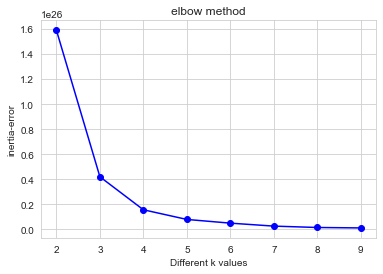

In [114]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [115]:
ssd # sum of squared distance

[1.590431604137222e+26,
 4.200603685110746e+25,
 1.5665330818990097e+25,
 7.938542251209433e+24,
 4.981029058879088e+24,
 2.6109877604493147e+24,
 1.512818591774198e+24,
 1.1721202849346406e+24]

In [116]:
pd.Series(ssd).diff()

0             NaN
1   -1.170371e+26
2   -2.634071e+25
3   -7.726789e+24
4   -2.957513e+24
5   -2.370041e+24
6   -1.098169e+24
7   -3.406983e+23
dtype: float64

In [117]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,1.170371e+26
3,2.634071e+25
4,7.726789e+24
5,2.957513e+24
6,2.370041e+24
7,1.098169e+24
8,3.406983e+23


### Model Building and label visualisation

<AxesSubplot:>

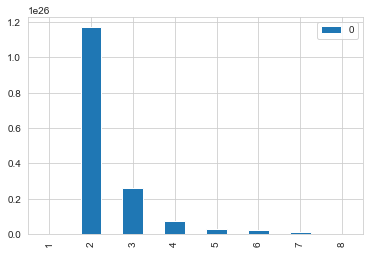

In [118]:
df_diff.plot(kind='bar')

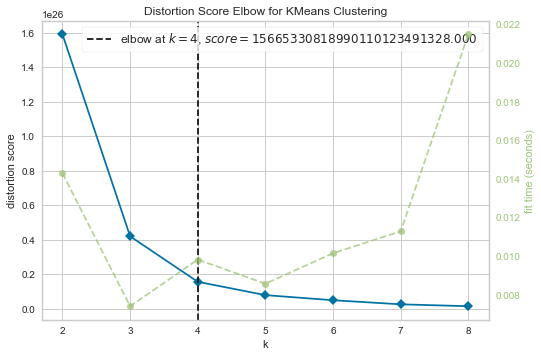

In [119]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

Silhouette analysis

In [120]:
from sklearn.metrics import silhouette_score

In [121]:
silhouette_score(X, K_means_model.labels_)

0.8659265329611899

In [122]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9217106207315645
For n_clusters=3, the silhouette score is 0.8982843016828449
For n_clusters=4, the silhouette score is 0.8655450776933625
For n_clusters=5, the silhouette score is 0.8659265329611899
For n_clusters=6, the silhouette score is 0.7763257378238931
For n_clusters=7, the silhouette score is 0.7793048385041842
For n_clusters=8, the silhouette score is 0.7822985806747971


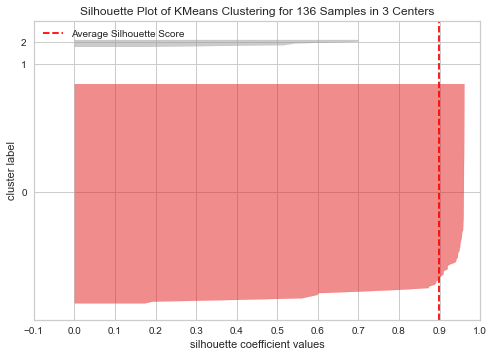

In [124]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

In [125]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0], dtype=int32)

In [126]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0], dtype=int32)

In [144]:
k_clusters = model.labels_

### Evaluate 

In [145]:
X["k_predicted_clusters"] = k_clusters

In [146]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes,predicted_clusters,agg_predicted_clusters,k_predicted_clusters
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0,0,0,1
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0,0,0,1
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0,0,0,1
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0,0,0,1
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0,0,0,1


## Hierarchical Clustering
- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance
 (Agglomerative)

## S(silhoutte) Score 
- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [136]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [137]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.9487490221839048
Silhouette Score for 3 clusters: 0.8982843016828449
Silhouette Score for 4 clusters: 0.8511593224811191
Silhouette Score for 5 clusters: 0.8519973820085143
Silhouette Score for 6 clusters: 0.8560280933824351
Silhouette Score for 7 clusters: 0.7658168204137543
Silhouette Score for 8 clusters: 0.7703532843557789
Silhouette Score for 9 clusters: 0.7724062266692485


In [138]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0])

In [139]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0])

### Model Building and label visualisation

In [141]:
agg_clusters = model1.labels_

In [147]:
X["agg_predicted_clusters"] = agg_clusters
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Classes,predicted_clusters,agg_predicted_clusters,k_predicted_clusters
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0,0,0,1
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0,0,0,1
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0,0,0,1
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0,0,0,1
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0,0,0,1


### Dendogram

In [131]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [148]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

### Evaluate 

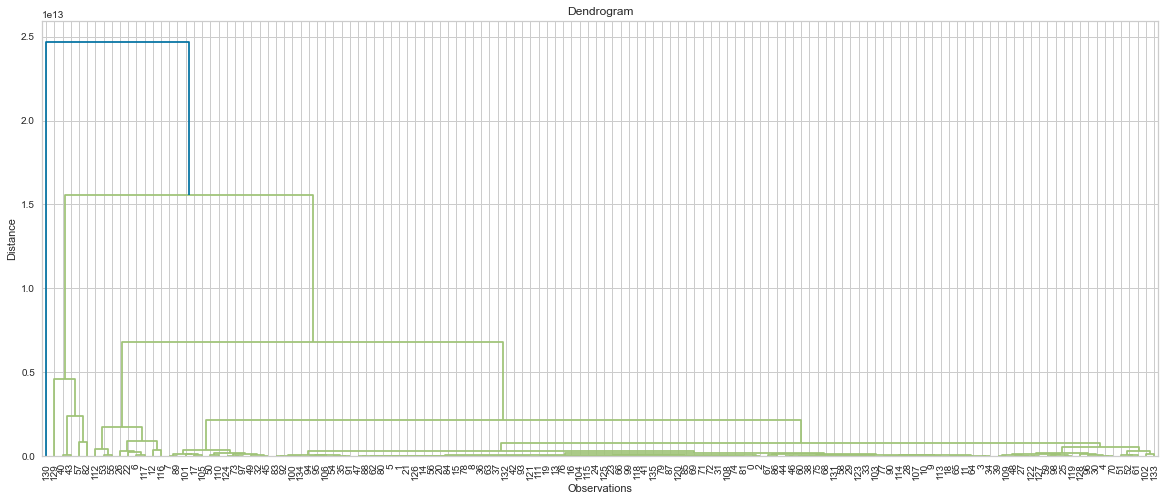

In [149]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

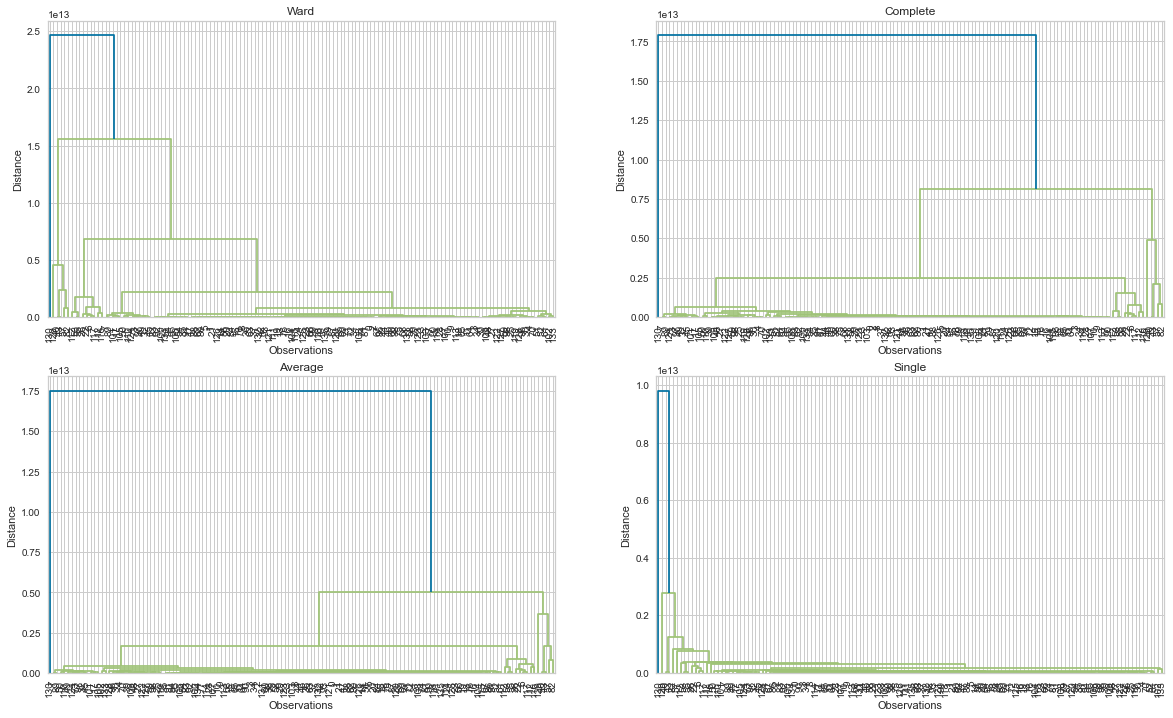

In [150]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

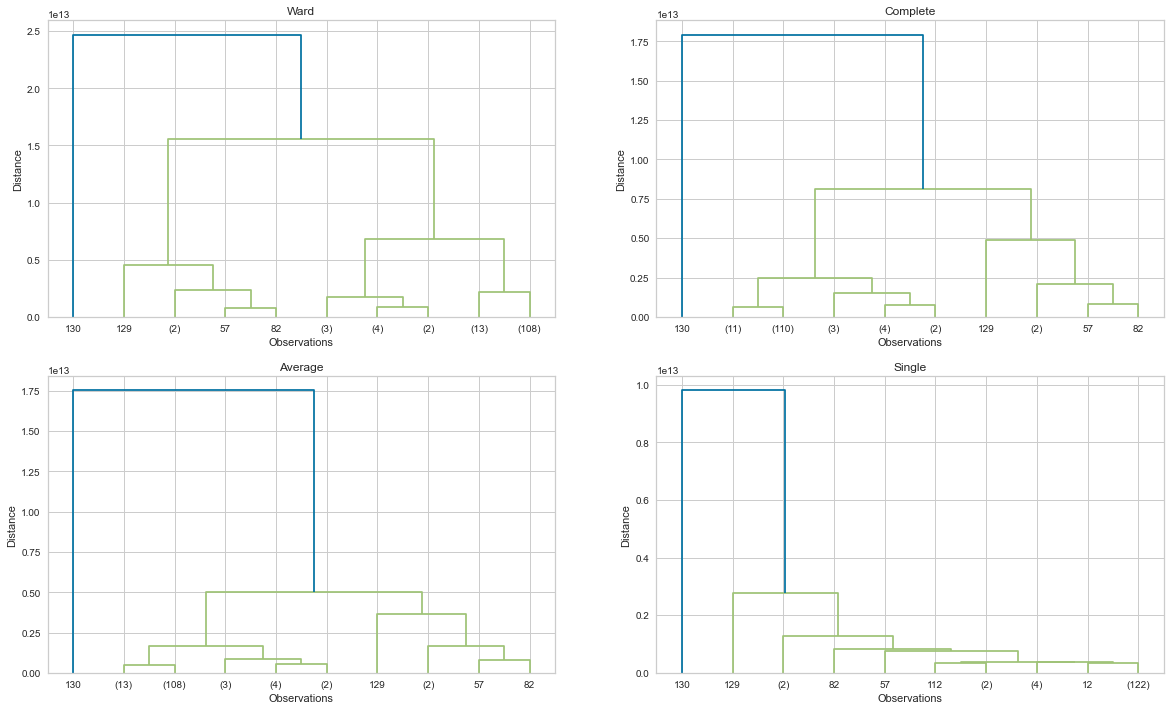

In [151]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);